In [1]:
import pandas as pd
import numpy as np
import xlrd
from matplotlib import pyplot as plt

In [120]:
def plot_multi_dataframe(df, startIndex, endIndex):
    plt.figure(figsize=(25,20))
    column_nr = df.shape[1]
    for i in range(0, column_nr):
        plt.subplot(column_nr, 1, i+1)
        sub_df = df[[df.columns[i]]]
        plt.plot(sub_df)
        plt.title(df.columns[i], y=0.5, loc='right')    
    plt.show()

def plot_train_test_dataframe(train, test):
    plt.figure(figsize=(25,20))
    column_nr = train.shape[1]
    for i in range(0, column_nr):
        plt.subplot(column_nr, 1, i+1)
        sub_train = train[[train.columns[i]]]
        sub_test = test[[test.columns[i]]]
        plt.plot(sub_train)
        plt.plot(sub_test)
        plt.title(train.columns[i], y=0.5, loc='right')    
    plt.show()

In [121]:
#read the data
df = pd.read_excel("Data Inputs.xlsx", skiprows=1)
df.head()


,SeriesDate,P1,P2,P3,P4,P5,US
0,2012-12-28,940,3463,8036,597,2306,15341
1,2013-01-04,1068,3471,7916,611,2190,15257
2,2013-01-11,1102,3451,7647,595,2305,15101
3,2013-01-18,1035,3360,7078,568,2165,14206
4,2013-01-25,999,3342,7361,554,2225,14481


In [122]:
data = df.drop(['US', 'SeriesDate'], axis=1)
data.index = df.SeriesDate
data.head()

,P1,P2,P3,P4,P5
SeriesDate,,,,,
2012-12-28,940,3463,8036,597,2306
2013-01-04,1068,3471,7916,611,2190
2013-01-11,1102,3451,7647,595,2305
2013-01-18,1035,3360,7078,568,2165
2013-01-25,999,3342,7361,554,2225


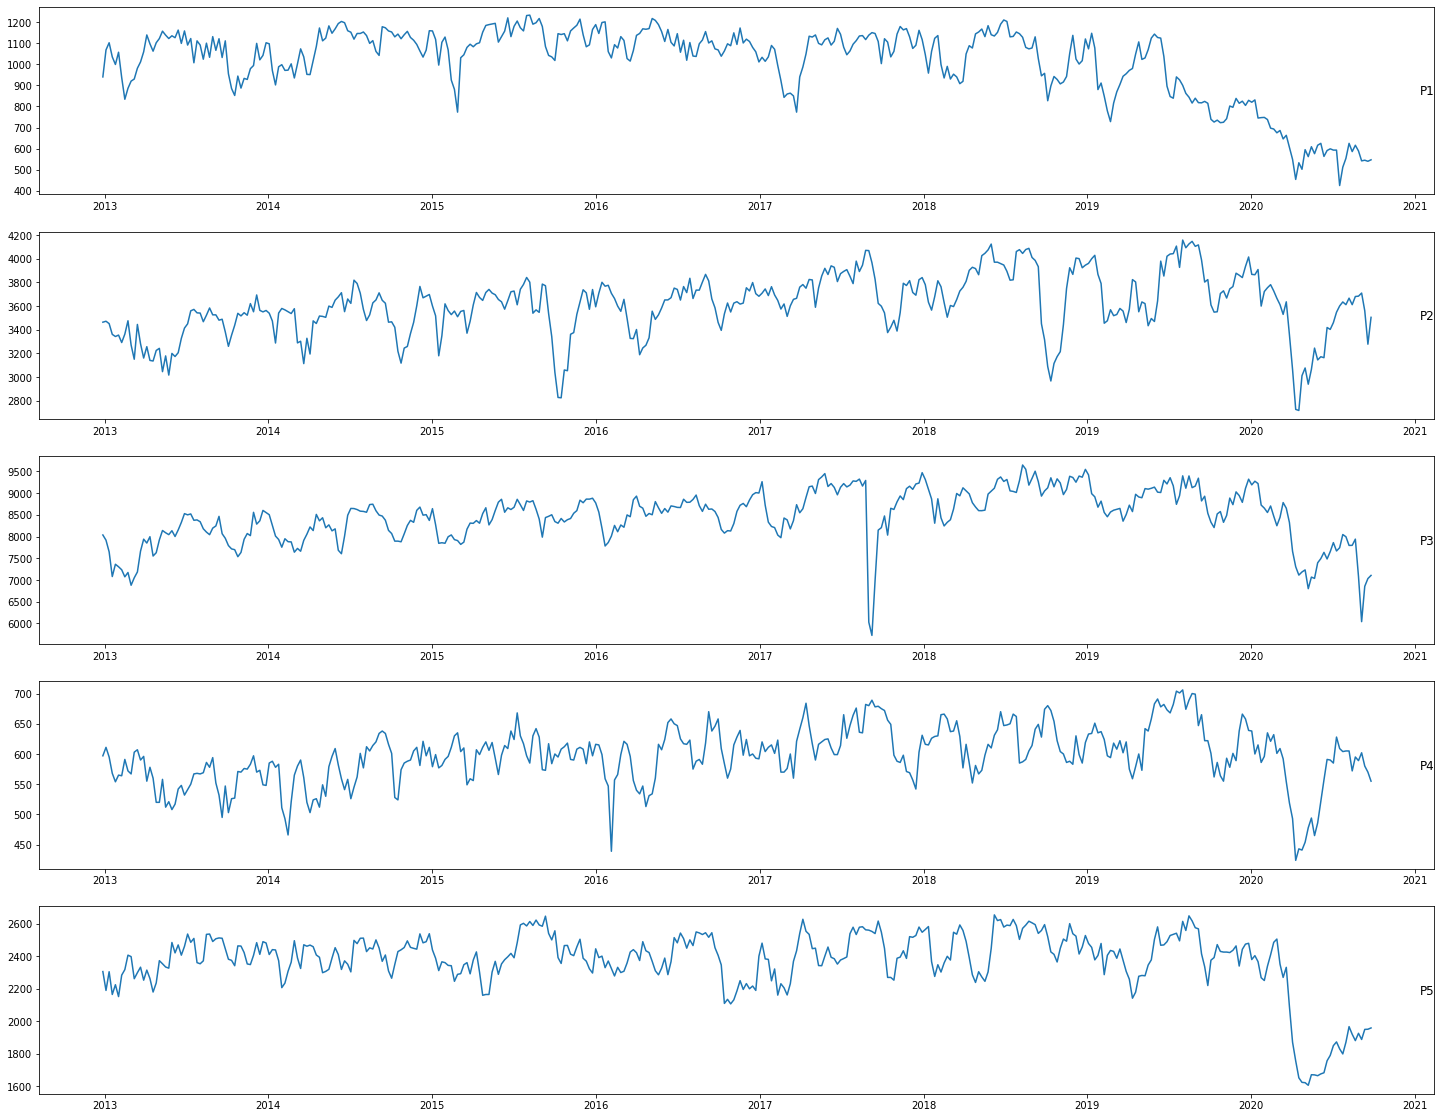

In [123]:
plot_multi_dataframe(data, 0, len(data))

In [124]:
n_forecast_days = 30
n_lag_days = 30

In [125]:

#creating the train and test set
values = data.values
train = data[:len(data)-n_forecast_days]
test = data[len(data)-n_forecast_days:]
print(train.head())
print(test.head())

              P1    P2    P3   P4    P5
SeriesDate                             
2012-12-28   940  3463  8036  597  2306
2013-01-04  1068  3471  7916  611  2190
2013-01-11  1102  3451  7647  595  2305
2013-01-18  1035  3360  7078  568  2165
2013-01-25   999  3342  7361  554  2225
             P1    P2    P3   P4    P5
SeriesDate                            
2020-03-06  686  3611  8442  609  2352
2020-03-13  646  3529  8783  592  2270
2020-03-20  663  3635  8653  554  2332
2020-03-27  607  3357  8323  519  2091
2020-04-03  549  3063  7659  493  1871


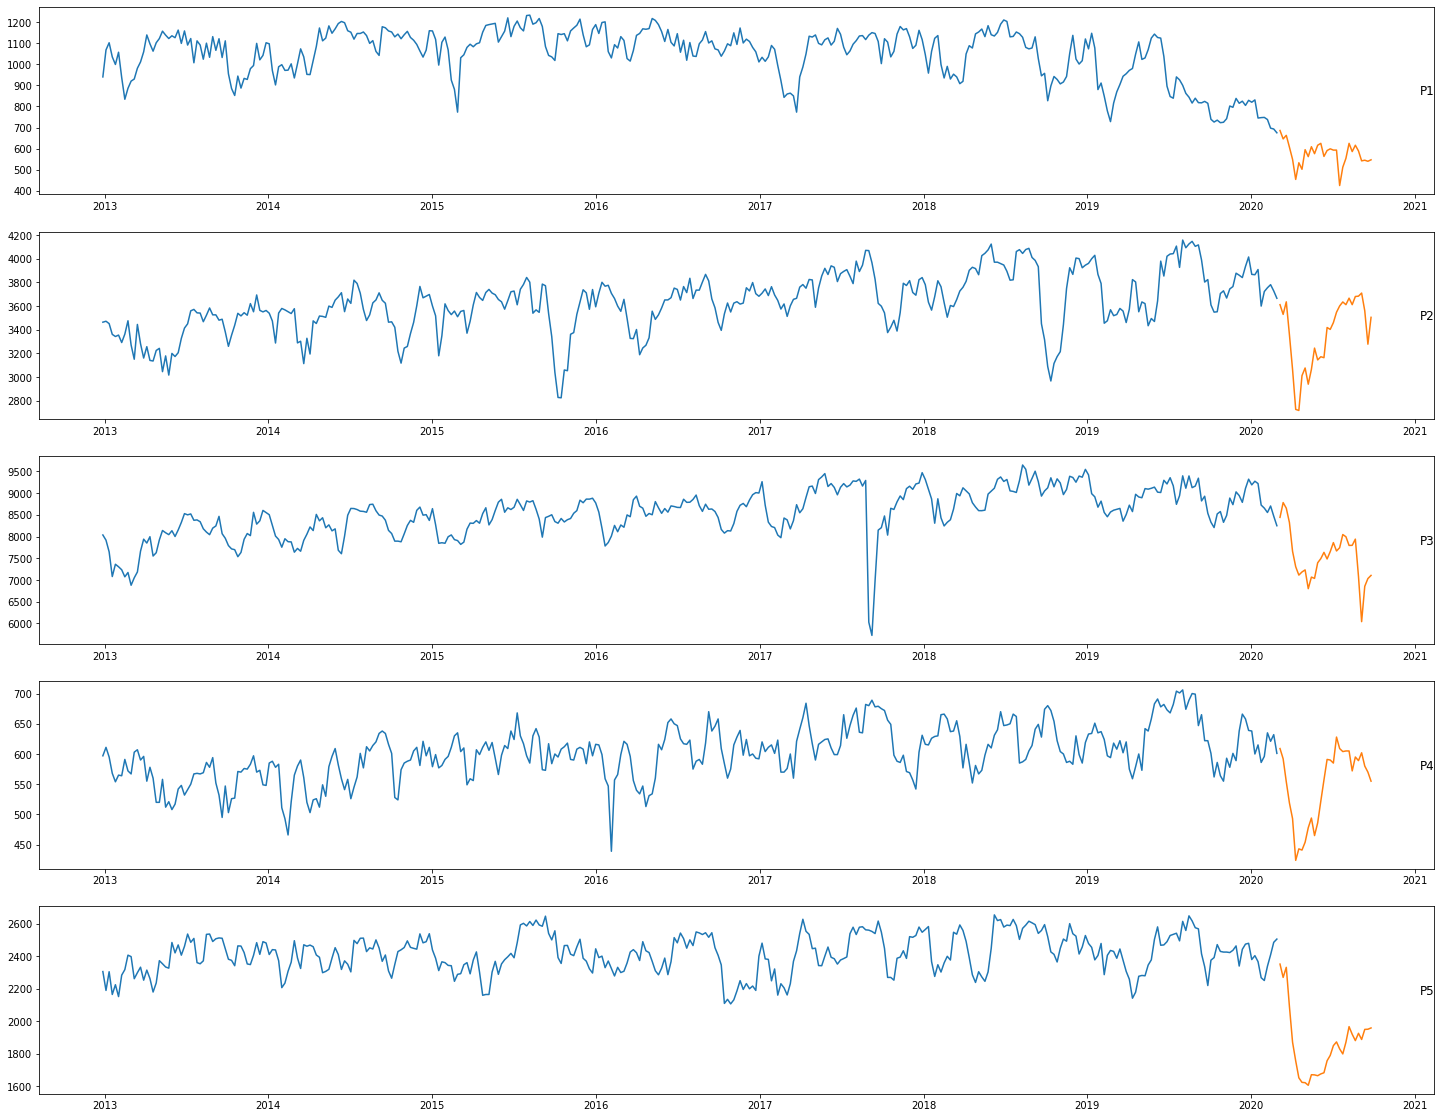

In [126]:
plot_train_test_dataframe(train, test)

In [175]:
def plot_results(real, predicted):
    # plot
    for i in range(real.shape[1]):
        rmse = np.sqrt(mean_squared_error(real[:, i], predictions[:, i]))
        mae = mean_absolute_error(real[:, i], predictions[:, i])
        rmse = ' RMSE: %.3f' % rmse
        mae = ' MAE: %.3f' % mae
        plt.figure(figsize=(25,10))
        plt.plot(real[:, i], label='real')
        plt.plot(predicted[:, i], color='red', label='prediction')
        plt.legend(loc="upper right")
        plt.title(train.columns[i] + rmse + mae)
        plt.show()

In [162]:
#fit the model
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [163]:
# model = VAR(train)
# model_fit = model.fit(n_lag_days)
# model_fit.y

In [1]:
# make prediction on test
history = train.copy(deep=True)
predictions = list()
for time in range(n_forecast_days):
    model = VAR(train)
    model_fit = model.fit(n_lag_days)
#     yhat = model_fit.forecast(history.values, 1)[0][0]
    yhat = model_fit.forecast(history.values, 1)[0]
    predictions.append(yhat.tolist())
    history = history.append(test[time:time+1])
# y_actual = test.values[:,0]
y_actual = test.values
predictions = np.asarray(predictions)

plot_results(y_actual, predictions)

NameError: name 'train' is not defined

In [14]:
# cols = data.columns
# #converting predictions to dataframe
# pred = pd.DataFrame(columns=[cols], data = prediction)
# # pred.index = test.index
# pred

,P1,P2,P3,P4,P5
0,686.562746,3613.131921,8523.189273,610.105909,2800.078564
1,940.786375,3607.192323,8674.755978,576.208238,2763.651813
2,1040.721655,3477.670978,9330.689377,568.848106,2763.438056
3,936.578240,4040.139377,9108.725385,514.339106,2689.878210
4,974.924194,3747.868375,9284.593796,530.349791,2516.902459
5,1134.714222,4032.106447,9297.240968,548.928935,2715.048306
6,885.957291,3968.725612,9211.117420,616.643616,2864.994889
7,998.328844,3738.755981,9261.403241,614.558794,2801.677064
8,1153.319022,3788.767471,9018.086068,680.017265,2785.135354
9,1253.220546,3798.841021,9104.594632,687.519187,2743.489211


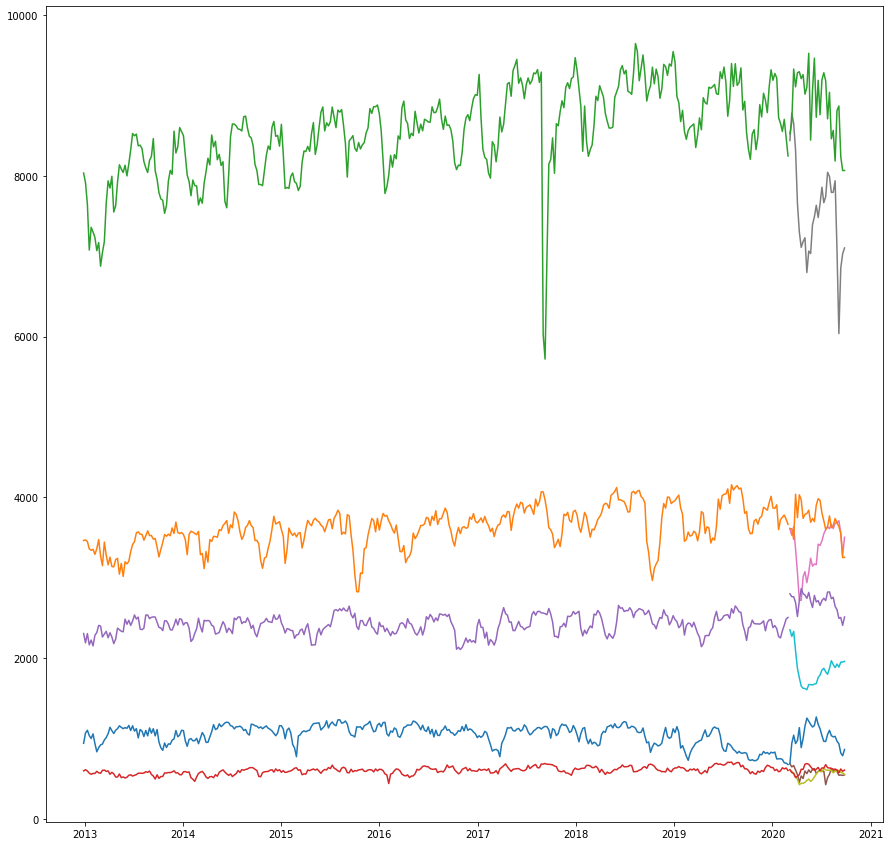

In [15]:
pred.index = test.index
plt.figure(figsize=(15,15))
plt.plot(train)
plt.plot(test)
plt.plot(pred)



In [24]:
# import math
# from sklearn.metrics import mean_squared_error
#check rmse
# for i in cols:
#     print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred[i], valid[i])))